In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2Z0MTQ5NjgvUmVwb3MvaW50cm8tY29kaW5nLWRhdGEtYW5hbHlzaXMvcXVhcnRvLzEw'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap.py": 1716061061.963526, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/importlib/_bootstrap_external.py": 1716061061.9664707, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/zipimport.py": 1716061059.8541, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/codecs.py": 1716061059.3098388, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/aliases.py": 1716061060.5232508, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/__init__.py": 1716061060.520605, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/encodings/utf_8.py": 1716061061.3768034, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/abc.py": 1716061059.2254992, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/io.py": 1716061059.4591994, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/stat.py": 1716061059.7052634, "/Users/ft14968/.pyenv/versions/3.11.1/lib/python3.11/_collections_abc.py": 17160

In [2]:
from PIL import Image
import numpy as np

im_filename = "ngc253_small.png"
im = np.array(Image.open(im_filename))

In [3]:
print(im.shape)

(907, 1000, 3)


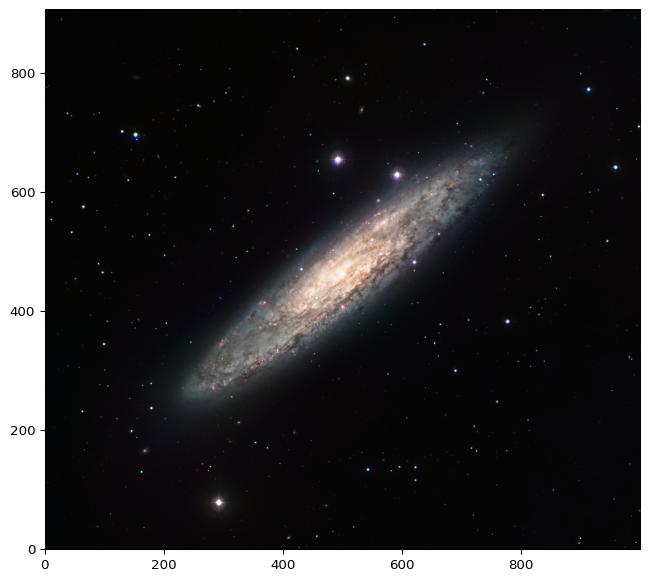

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im, origin="lower")

In [5]:
def inside_ellipse(x, y, centre=(0,0), a=2, b=1, alpha=0):
    
    x0,y0 = centre
    
    # Convert alpha in degrees to radians for use with cos/sin function
    alpha_rad = np.radians(alpha)
    
    term1 = ((x-x0)*np.cos(alpha_rad) + (y-y0)*np.sin(alpha_rad))**2 / a**2
    term2 = ((x-x0)*np.sin(alpha_rad) - (y-y0)*np.cos(alpha_rad))**2 / b**2
    
    total = term1 + term2

    return total<1

In [6]:
x1 = 0
y1 = 0
position_is_in_ellipse1 = inside_ellipse(x1, y1, centre=(0, 0), a=2, b=1, alpha=0)
print(f"Is position ({x1}, {y1}) inside the ellipse? {position_is_in_ellipse1}")

x2 = 0
y2 = 4
position_is_in_ellipse2 = inside_ellipse(x2, y2, centre=(0, 0), a=2, b=1, alpha=0)
print(f"Is position ({x2}, {y2}) inside the ellipse? {position_is_in_ellipse2}")

Is position (0, 0) inside the ellipse? True
Is position (0, 4) inside the ellipse? False


In [7]:
# ADD CODE HERE
rows, cols = np.indices((im.shape[0], im.shape[1]))
centre = (500,470)
a = 365
b = 70
alpha = 33
mask = inside_ellipse (cols, rows, centre, a, b , alpha)

im_masked = im.copy()
im_masked[np.logical_not(mask),:] = 0 # you can use ~ instead of the logical_not function

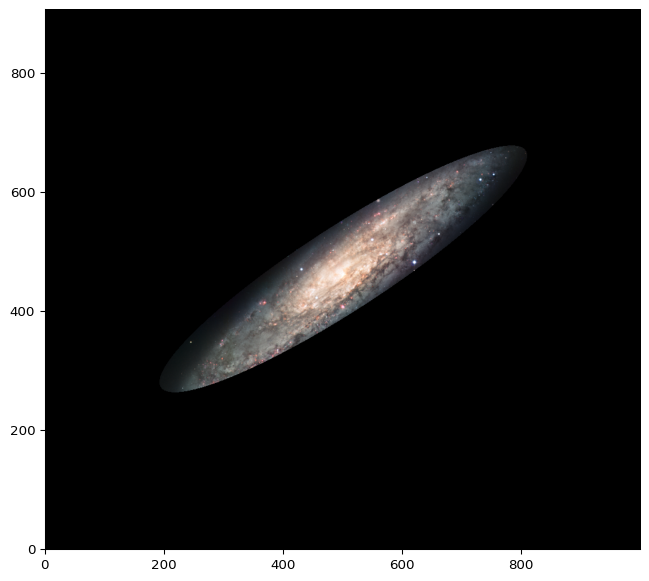

In [8]:
# UNCOMMENT THIS CODE TO PLOT YOUR MASKED IMAGE

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im_masked.astype(int),origin="lower")

In [9]:
# ADD CODE HERE

# Select the third channel (B) and calculate the sum
im_B_channel = im_masked[:, :, 2]
summed_B = np.sum(im_B_channel)

# Apply the scale factor to get approximated flux value
scale_factor = 2.8e-7
flux_scaled_B = summed_B*scale_factor

# Calculate the magnitude using the np.log10 function
magnitude_B = -2.5*np.log10(flux_scaled_B) + 8.90
print(magnitude_B)

8.070961081466722
